# London House Price Data Machine Learning Project  

The point of this notebook is to expand on my supervised machine learning regression into a Kaggle dataset.



## Import packages

The first thing that I need to do is import all of the relevant packages that I will need to complete this problem.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
import copy
import math
%matplotlib inline


# Define the problem

Firstly I want to import, get brief descriptions about it and try to make sure that there is not any garbage

In [50]:
prices_raw = pd.read_csv('London.csv')
print(prices_raw.head())
print(prices_raw.describe())

   Unnamed: 0  Property Name    Price        House Type  Area in sq ft  \
0           0    Queens Road  1675000             House           2716   
1           1  Seward Street   650000  Flat / Apartment            814   
2           2    Hotham Road   735000  Flat / Apartment            761   
3           3   Festing Road  1765000             House           1986   
4           4   Spencer Walk   675000  Flat / Apartment            700   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions     Location  \
0                5                 5                  5    Wimbledon   
1                2                 2                  2  Clerkenwell   
2                2                 2                  2       Putney   
3                4                 4                  4       Putney   
4                2                 2                  2       Putney   

  City/County Postal Code  
0      London    SW19 8NY  
1      London    EC1V 3PA  
2      London    SW15 1QL  
3      Lon

I am looking to focus initially on a price prediction model that focusses only on one variable.  Therefore, for my first pass at the data I will drop all columns except price and area, I am also scaling features so that they are of similar size.

In [51]:
price_area = prices_raw[['Price','Area in sq ft']]
price_area.loc[:, 'Price'] = (price_area['Price'].div(1000).round(0))
print(price_area.head())

   Price  Area in sq ft
0   1675           2716
1    650            814
2    735            761
3   1765           1986
4    675            700


I will also trim it to use a random sample as training data and the other as a prediciton tool.  I could also later try to compare it to random samples from Rightmove.


In [52]:
train, test = train_test_split(price_area,test_size= 0.8)
print(test.describe())
print(train.describe())

              Price  Area in sq ft
count   2784.000000    2784.000000
mean    1844.632902    1700.001796
std     2173.856221    1357.433405
min      180.000000     292.000000
25%      738.750000     836.000000
50%     1200.000000    1295.000000
75%     2150.000000    2140.500000
max    34000.000000   15405.000000
              Price  Area in sq ft
count    696.000000     696.000000
mean    1942.343391    1764.860632
std     2608.021145    1391.008305
min      250.000000     274.000000
25%      770.250000     831.500000
50%     1285.000000    1388.000000
75%     2150.000000    2266.250000
max    39750.000000   12546.000000


In [53]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


I think I need to convert the data to numpy arrays

In [54]:
x_train = train['Area in sq ft'].to_numpy()
y_train = train['Price'].to_numpy()

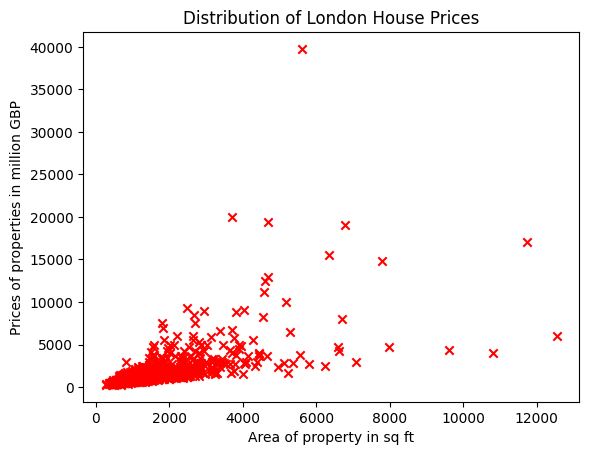

In [55]:
plt.scatter(x_train,y_train,marker = 'x', c='r')
plt.title('Distribution of London House Prices')
plt.ylabel('Prices of properties in million GBP')
plt.xlabel('Area of property in sq ft')
plt.show()

In [56]:
def compute_cost_funtion(x, y, w, b): 

    m = x.shape[0] 
    
    total_cost = 0
    
    cost_sum = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
        
    total_cost = cost_sum / ( 2 * m)
    
    return total_cost

In [57]:
# Compute cost with some initial values for paramaters w, b
initial_w = 1

initial_b = 1

cost = compute_cost_funtion(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost}')

<class 'numpy.float64'>
Cost at initial w: 2176545.9985632184


In [58]:
def compute_gradient_descent(x, y, w, b): 

    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        
        dj_dw_i = (f_wb - y[i]) * x[i]
        
        dj_db_i = f_wb - y[i]
        
        dj_db += dj_db_i
        
        dj_dw += dj_dw_i
    
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
         
        
    return dj_dw, dj_db

In [59]:
#testing with zero variables

initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient_descent(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -5629055.317528736 -1942.3433908045977


In [60]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [74]:
initial_w = 0
initial_b = 0

iterations =33
alpha = 0.001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 79926361296063.34   
Iteration    4: Cost 33586909693852291695024508114727545031622656.00   
Iteration    8: Cost 14113998369732495790663157265019242851121781586606003325218547853732872192.00   
Iteration   12: Cost 5931029433686589337291508135980527104073159127383195833916599595304038005537471609300146478296751669248.00   
Iteration   16: Cost 2492356114954213321553135777044852781741275817491251027182396551029115503115387178836478242143541643276427913178173613627500591579136.00   
Iteration   20: Cost 1047345839909036347222728575566098825831103955086246934662021640808332777602486415815753041132831247866038648786575964997421796738961006853560120153276651384340480.00   
Iteration   24: Cost 440119011000525163174557521801344467291364245877378149797215116906522605654480234187241655476246394077333995216593040329588504659805901807301830136825580954748058149239465325811224404618641408.00   
Iteration   28: Cost 184948215253238449317919692163388573569222876596119350587306

Cost is increasing with each iteration so learning changes need to be made.


In [82]:
initial_w = 0
initial_b = 0

iterations =100
alpha = 1e-6

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 53554124.48   
Iteration   10: Cost 71353397424518799360.00   
Iteration   20: Cost 99031512334931852715543932960768.00   
Iteration   30: Cost 137446019241320964740698451385745332653522944.00   
Iteration   40: Cost 190761584468117296941107535006055183872680540071614480384.00   
Iteration   50: Cost 264758356114301769678385081075251163098019009024695234714522336886784.00   
Iteration   60: Cost 367458612423417543269018272846099938948826349879478189232400922961446986015834112.00   
Iteration   70: Cost 509996488216038191107547374729445744321469759428913641778405584581651350712362178001151983616.00   
Iteration   80: Cost 707825069814897546826242065572649894059092718351678684534060116438619946353687106901445909706027783159808.00   
Iteration   90: Cost 982391724325425348009904359170151065408971364946478307715305652496345330427418711158278288935699259874214605326647296.00   
w,b found by gradient descent: -5.743917944507378e+60 -2.0086194592840973e+57


In [88]:
initial_w = 0
initial_b = 0

iterations =5000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 5279181.91   
Iteration  500: Cost 4036113.29   
Iteration 1000: Cost 3285774.27   
Iteration 1500: Cost 2832855.88   
Iteration 2000: Cost 2559466.03   
Iteration 2500: Cost 2394442.91   
Iteration 3000: Cost 2294831.92   
Iteration 3500: Cost 2234704.90   
Iteration 4000: Cost 2198411.13   
Iteration 4500: Cost 2176503.55   
w,b found by gradient descent: 1.0259812651663098 0.00034572594259980264


I am happy that I have found a learning rate which decreases over time, so now we experiment with iterations.

In [89]:
initial_w = 0
initial_b = 0

iterations =50000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 5279181.91   
Iteration 5000: Cost 2163279.73   
Iteration 10000: Cost 2143271.53   
Iteration 15000: Cost 2143143.05   
Iteration 20000: Cost 2143142.22   
Iteration 25000: Cost 2143142.22   
Iteration 30000: Cost 2143142.22   
Iteration 35000: Cost 2143142.21   
Iteration 40000: Cost 2143142.21   
Iteration 45000: Cost 2143142.21   
w,b found by gradient descent: 1.1153584724432386 0.00025948951694606496


Clearly too many but optimisation..

In [90]:
initial_w = 0
initial_b = 0

iterations =20000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 5279181.91   
Iteration 2000: Cost 2559466.03   
Iteration 4000: Cost 2198411.13   
Iteration 6000: Cost 2150479.42   
Iteration 8000: Cost 2144116.26   
Iteration 10000: Cost 2143271.53   
Iteration 12000: Cost 2143159.38   
Iteration 14000: Cost 2143144.50   
Iteration 16000: Cost 2143142.52   
Iteration 18000: Cost 2143142.26   
w,b found by gradient descent: 1.1153124551118203 0.0003378008619573841


Looks like we have a solution of w = 1.115 and b = 0.0003.  I will now attempt to draw the line from this on top of the training dataset.

In [95]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b


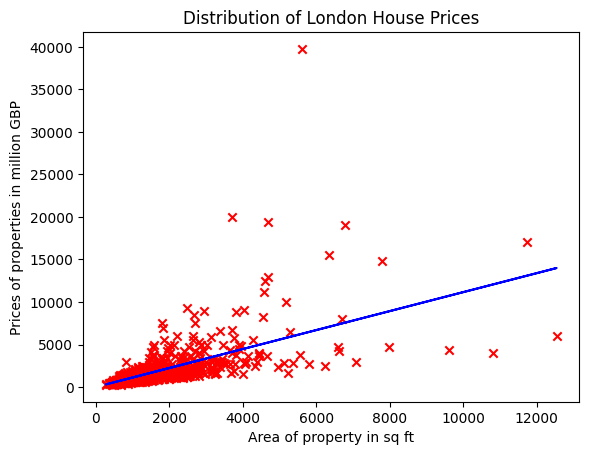

In [97]:
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title('Distribution of London House Prices')
plt.ylabel('Prices of properties in million GBP')
plt.xlabel('Area of property in sq ft')
plt.show()


Graph above looks like we have a believeable trend line based on the relationship of these two factors.

I will now try to test my values of w,b against the remainiing test data that I have so far not used..

In [98]:
x_test = test['Area in sq ft'].to_numpy()
y_test = test['Price'].to_numpy()

In [101]:

def test_model(X, w, b, y=None):

    X = X.reshape(-1, 1)
    w = np.array([w])
    m = X.shape[0]  # number of examples
    
    predictions = np.dot(X, w) + b
    
    print("Model Summary Statistics:")
    print(f"Number of examples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    
    print("\nPrediction Statistics:")
    print(f"Mean prediction: {np.mean(predictions):.4f}")
    print(f"Median prediction: {np.median(predictions):.4f}")
    print(f"Min prediction: {np.min(predictions):.4f}")
    print(f"Max prediction: {np.max(predictions):.4f}")
    
    if y is not None:
        errors = predictions - y
        mse = np.mean(errors**2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(errors))
        r2 = 1 - (np.sum(errors**2) / np.sum((y - np.mean(y))**2))
        
        print("\nError Metrics:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R-squared (R2) Score: {r2:.4f}")
        
        print("\nError Statistics:")
        print(f"Mean error: {np.mean(errors):.4f}")
        print(f"Median error: {np.median(errors):.4f}")
        print(f"Min error: {np.min(errors):.4f}")
        print(f"Max error: {np.max(errors):.4f}")
    
    return predictions


predictions = test_model(x_test, w, b, y_test)

Model Summary Statistics:
Number of examples: 2784
Number of features: 1

Prediction Statistics:
Mean prediction: 1896.0335
Median prediction: 1444.3300
Min prediction: 325.6716
Max prediction: 17181.3887

Error Metrics:
Mean Squared Error (MSE): 2491058.8280
Root Mean Squared Error (RMSE): 1578.3089
Mean Absolute Error (MAE): 794.0769
R-squared (R2) Score: 0.4727

Error Statistics:
Mean error: 51.4006
Median error: 207.6001
Min error: -25302.7931
Max error: 8854.3164


All of these error metrics show that this model is not very good at predicting house prices in London.  However, this is to be expected because the data is not going to be very well correlated given the fact some are flats, area diffences and potentially time differences between sold prices.

I think I will try to do the same analysis again but with more features and differential the data in some way before processing the regression.